In [2]:
#Importing Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Question 1
#read image opencv-logo
#display shape and size of the image

In [4]:
#read image opencv-logo
img = cv2.imread('opencv-logo.png', cv2.IMREAD_UNCHANGED)

#display shape and size of the image
dimensions = img.shape
height, width, channels = dimensions
print(f"The Dimension is {height} x {width} pixels with height: {height}, weight: {width}")
print(f"Image has {channels} Channels")

The Dimension is 739 x 600 pixels with height: 739, weight: 600
Image has 4 Channels


### Question 2
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
#display this black image
#Similarly create a numpy array on ones with above dimensions and display the white image


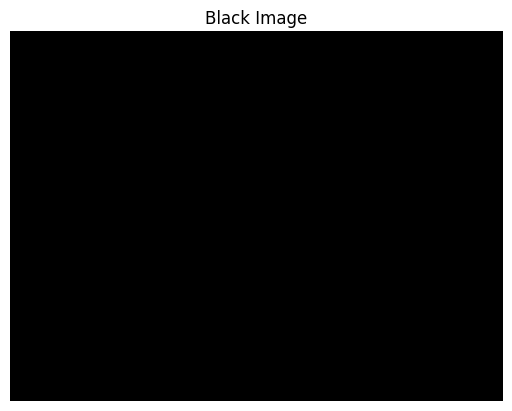

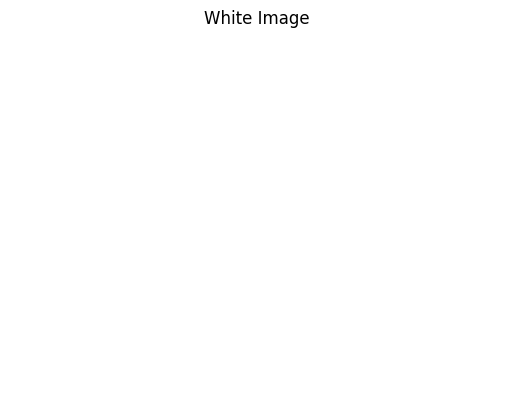

In [7]:
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
black_image = np.zeros((150, 200, 3), dtype=np.uint8)

# create a numpy array on ones with above dimensions
white_image = np.ones((150, 200, 3), dtype=np.uint8) * 255

# Display the black image
plt.imshow(black_image)
plt.title("Black Image")
plt.axis("off") 
plt.show()

# Display the white image
plt.imshow(white_image)
plt.title("White Image")
plt.axis("off")
plt.show()


### Question 3
#read the butterfly image and display the r,g,b channels of the image
#Then display the butterfly image in the HSV color space

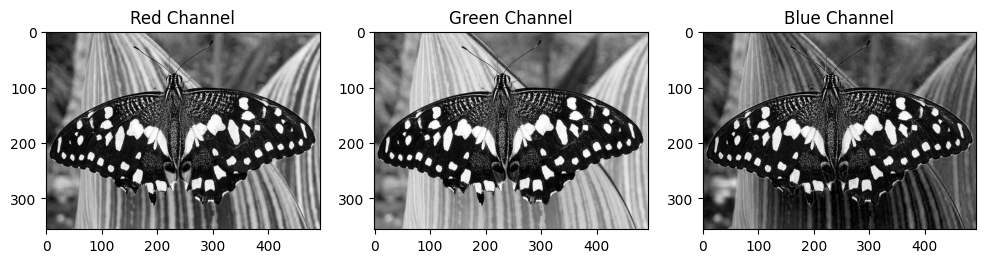

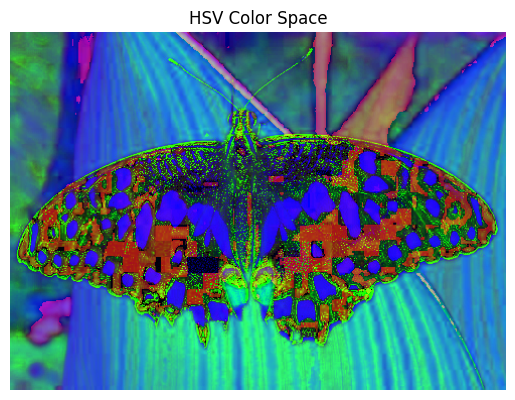

In [8]:
# Read the butterfly image
butterfly_img = cv2.imread('butterfly.jpg', cv2.IMREAD_COLOR)

# Split the image into R, G, B channels
b, g, r = cv2.split(butterfly_img)

# Display the individual channels
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(r, cmap='gray'), plt.title('Red Channel')
plt.subplot(132), plt.imshow(g, cmap='gray'), plt.title('Green Channel')
plt.subplot(133), plt.imshow(b, cmap='gray'), plt.title('Blue Channel')
plt.show()

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(butterfly_img, cv2.COLOR_BGR2HSV)

# Display the HSV image
plt.imshow(hsv_img)
plt.title('HSV Color Space')
plt.axis('off')
plt.show()


### Question 4
#create a 5 by 5 array where every number is a 10
#run the cell below to create an array of random numbers and see if you can figure out how it works.
#what are the largest and smalled values in this array?
#use PIL and matplotlib to read and display the any image of your choice from the given images.
#convert the image to a NumPy Array
#use slicing to set the RED and GREEN channels of the picture to 0, then use imshow() to show the isolated blue channel


largest Value: 0.9450586130625058 Smallest_value: 0.07974512054381844


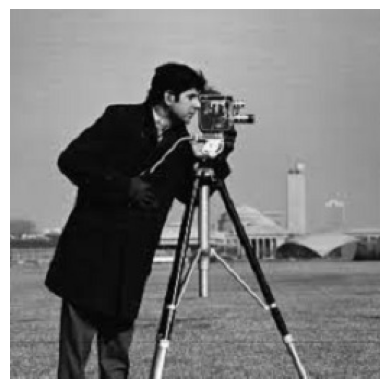

In [9]:
#create a 5 by 5 array where every number is a 10
my_array = np.full((5, 5), 10)

#run the cell below to create an array of random numbers and see if you can figure out how it works.
random_array = np.random.rand(5, 5)

#what are the largest and smalled values in this array?
largest_value = np.max(random_array)
smallest_value = np.min(random_array)

print("largest Value:", largest_value, "Smallest_value:", smallest_value )

#use PIL and matplotlib to read and display the any image of your choice from the given images.
image_path = 'cameraman.jpg'
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

#convert the image to a NumPy Array
img_array = np.asarray(img)

#use slicing to set the RED and GREEN channels of the picture to 0, then use imshow() to show the isolated blue channel
blue_channel = img_array.copy()
blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0

plt.imshow(blue_channel)
plt.axis('off')
plt.show()


### Question 5
#read in the players image
#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
#b) stretch the image to dim = (600,600)
#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST


In [10]:
# Read the player's image 
image_path = 'players.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# a) Half the image (fx=0.5, fy=0.5)
half_image = cv2.resize(original_image, None, fx=0.5, fy=0.5)

# b) Stretch to 600x600
stretched_image = cv2.resize(original_image, (600, 600))

# c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST)
stretched_nearest_image = cv2.resize(original_image, (600, 600), interpolation=cv2.INTER_NEAREST)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv2.cvtColor(half_image, cv2.COLOR_BGR2RGB)), plt.title('Half the image (fx=0.5, fy=0.5)')
plt.subplot(132), plt.imshow(cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB)), plt.title('Stretched to 600x600')
plt.subplot(133), plt.imshow(cv2.cvtColor(stretched_nearest_image, cv2.COLOR_BGR2RGB)), plt.title('using cv.INTER_NEAREST)')
plt.show()

### Question 6
#read in the detect_blob image
#then draw a box shape around the blue solid box in the image that is your region of interest
#crop your region of interest
#and then rotate it 45 degrees so that it is not clipped

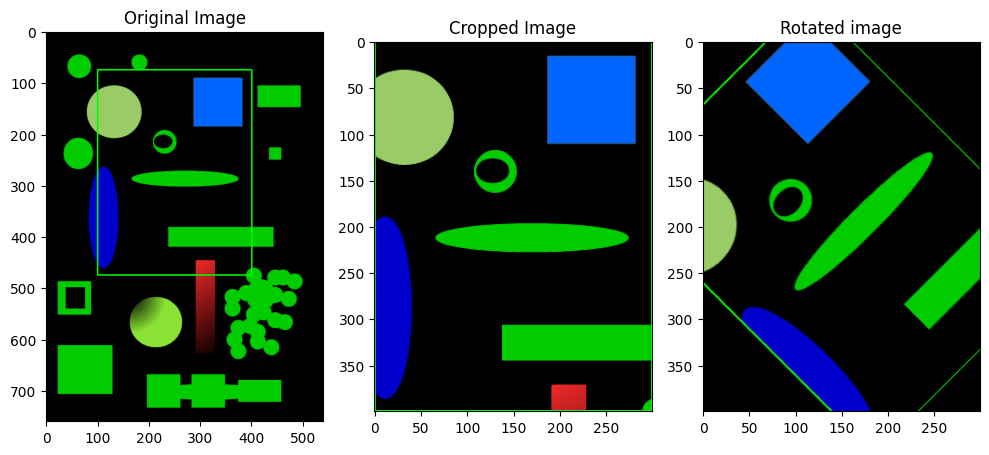

In [25]:
#reading in the detect_blob image
image = cv2.imread('detect_blob.png')

x, y, w, h = 100,75,300,400

# Draw a box shape around the blue solid box in the image
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Crop the region of interest
croppedImage = image[y:y + h, x:x + w]

# Rotate the cropped by 45 degrees
rows, cols, _ = croppedImage.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv2.warpAffine(croppedImage, M, (cols, rows))

# Display the results
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(132)
plt.imshow(cv2.cvtColor(croppedImage, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")

plt.subplot(133)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated image")

plt.tight_layout()
plt.show()

### Question 7
#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image (Hint: look into Opencv for operations)
#Finally apply canny edge detection - experiment using wide and narrow thresholds 
#(so just 2 images in total one wide and one narrow)

In [25]:
# read in the thresh image
thresh_image = cv2.imread('thresh.jpg', cv2.IMREAD_GRAYSCALE)

# perform thresholding by using gaussian blur with thresholds 5,55
blurred_5 = cv2.GaussianBlur(thresh_image, (5, 5), 0)
blurred_55 = cv2.GaussianBlur(thresh_image, (55, 55), 0)

# perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image
kernel = np.ones((5, 5), np.uint8)

dilated = cv2.dilate(thresh_image, kernel, iterations=1)
eroded = cv2.erode(thresh_image, kernel, iterations=1)
opened = cv2.morphologyEx(thresh_image, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel)

edges_wide = cv2.Canny(thresh_image, 50, 150)
edges_narrow = cv2.Canny(thresh_image, 100, 200)

# Display the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1), plt.imshow(thresh_image, cmap='gray'), plt.title('Original Threshold Image')
plt.subplot(3, 3, 2), plt.imshow(blurred_5, cmap='gray'), plt.title('Blurred (Threshold 5)')
plt.subplot(3, 3, 3), plt.imshow(blurred_55, cmap='gray'), plt.title('Blurred (Threshold 55)')
plt.subplot(3, 3, 4), plt.imshow(dilated, cmap='gray'), plt.title('Dilated')
plt.subplot(3, 3, 5), plt.imshow(eroded, cmap='gray'), plt.title('Eroded')
plt.subplot(3, 3, 6), plt.imshow(opened, cmap='gray'), plt.title('Opening')
plt.subplot(3, 3, 7), plt.imshow(closed, cmap='gray'), plt.title('Closing')
plt.subplot(3, 3, 8), plt.imshow(edges_wide, cmap='gray'), plt.title('Canny Edges (Wide)')
plt.subplot(3, 3, 9), plt.imshow(edges_narrow, cmap='gray'), plt.title('Canny Edges (narrow)')
plt.show()



### Question 8
#read in the butterfly image
#open the chess_football image and display it in the notebook. Make sure to correct for the RGB order
#flip the image upside down and display it in the notebook.
#draw an empty RED rectangle around the butterfly and display the image in the notebook.
#draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.
#now fill in this triangle
#display the original image as well as the resultant image

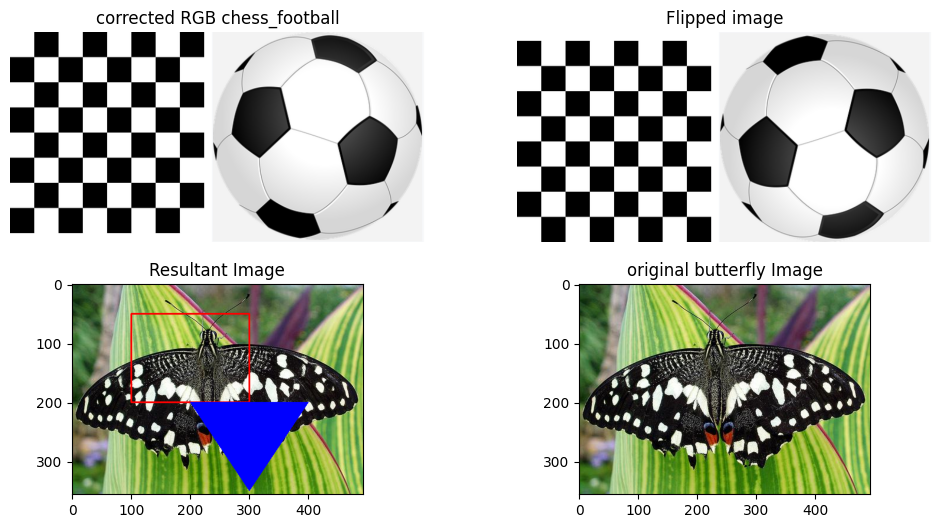

In [39]:
# reading in the butterfly image
butterfly_image = cv2.imread('butterfly.jpg', cv2.IMREAD_COLOR)
butterfly_image_org = butterfly_img

# opening the chess_football image and display it in the notebook.
chess_football_image = cv2.imread('chess_football.png', cv2.IMREAD_COLOR)

# Correcting the channel order (convert BGR to RGB)
chess_football_image_rgb = cv2.cvtColor(chess_football_image, cv2.COLOR_BGR2RGB)

# Flip the image upside down
flipped_image = cv2.flip(chess_football_image_rgb, 0)

# Drawing an empty red rectangle around the butterfly
rect_x, rect_y, rect_w, rect_h = 100, 50, 200, 150
cv2.rectangle(butterfly_image, (rect_x, rect_y), (rect_x + rect_w, rect_y + rect_h), (0, 0, 255), 2)

# Drawing a blue triangle in the middle of the image
triangle_points = np.array([[200, 200], [300, 350], [400, 200]], np.int32)
cv2.polylines(butterfly_image, [triangle_points], isClosed=True, color=(255, 0, 0), thickness=1)

# Fill in the triangle
cv2.fillPoly(butterfly_image, [triangle_points], color=(255, 0, 0))

# Display the original and resultant images
plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(chess_football_image_rgb), plt.title('corrected RGB chess_football')
plt.axis('off')
plt.subplot(222), plt.imshow(flipped_image), plt.title('Flipped image')
plt.axis('off')
plt.subplot(223), plt.imshow(cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2RGB)), plt.title('Resultant Image')
plt.subplot(224), plt.imshow(cv2.cvtColor(butterfly_image_org, cv2.COLOR_BGR2RGB)), plt.title('original butterfly Image')
plt.show()


### Question 9
#create a script that opens the picture and allows you to draw empty red circles where ever you click the RIGHT MOUSE BUTTON DOWN


In [46]:
# Read the image
image_path = 'opencv-logo.png'
image = cv2.imread(image_path)

circle_centers = []

def draw_circle(event, x, y, flags, param):
    global circle_centers
    if event == cv2.EVENT_RBUTTONDOWN:
        circle_centers.append((x, y))
        cv2.circle(image, (x, y), 10, (0, 0, 255), 2)

cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_circle)

while True:
    cv2.imshow('Image', image)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

print("Circle Centers:")
for center in circle_centers:
    print(center)

cv2.destroyAllWindows()


KeyboardInterrupt: 

### Question 10
#open and display the any image of your choice
#apply a binary threshold onto the image
#convert image colorspace to HSV and display the image
#create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the image (displayed in normal RGB)
#create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image and then display the resulting gradient filtered version of the image.
#plot the color histograms for the RED, BLUE, and GREEN channel of the image. Pay careful attention to the ordering of the channels

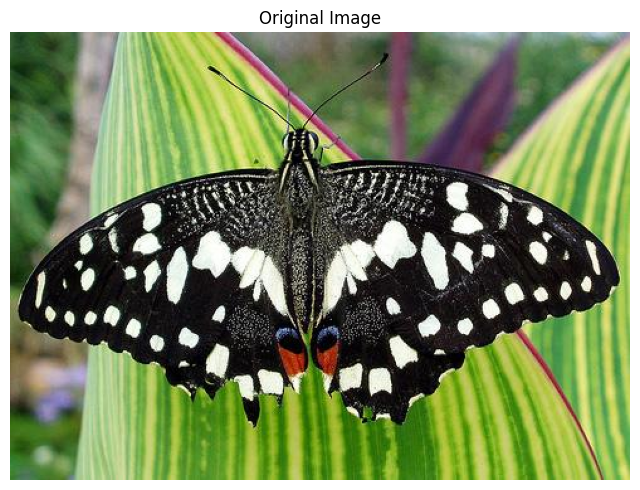

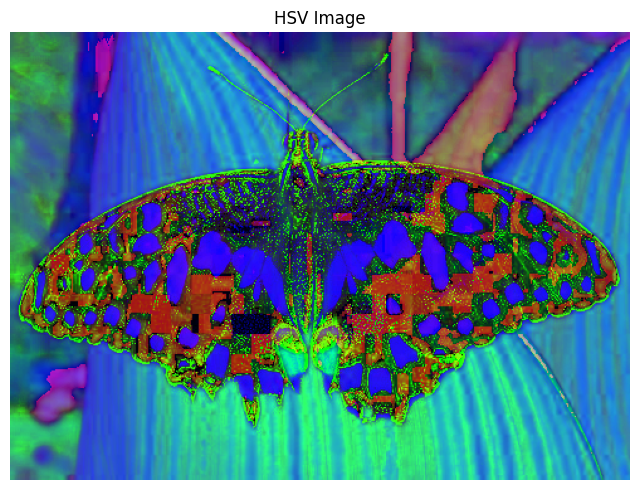

[[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]


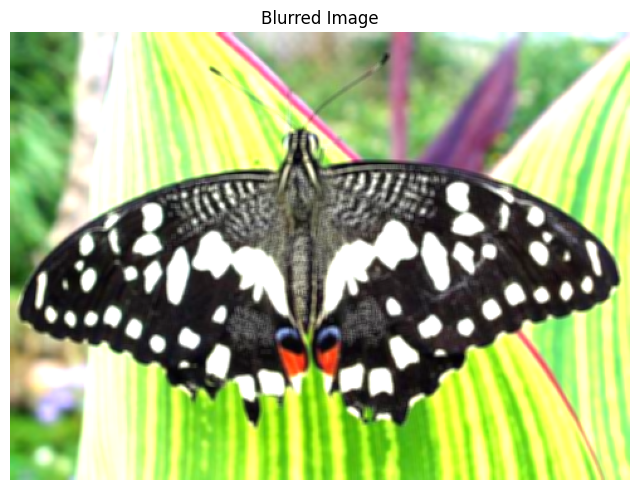

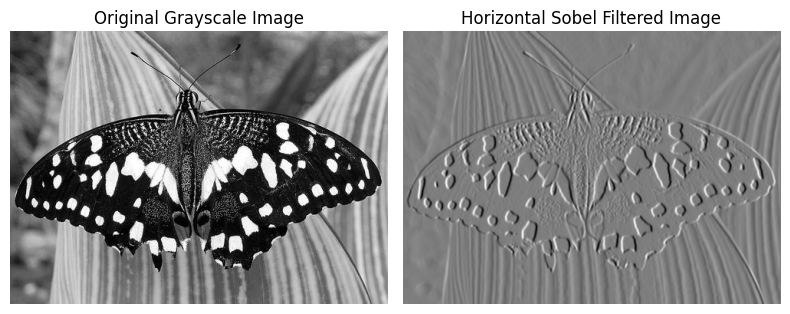

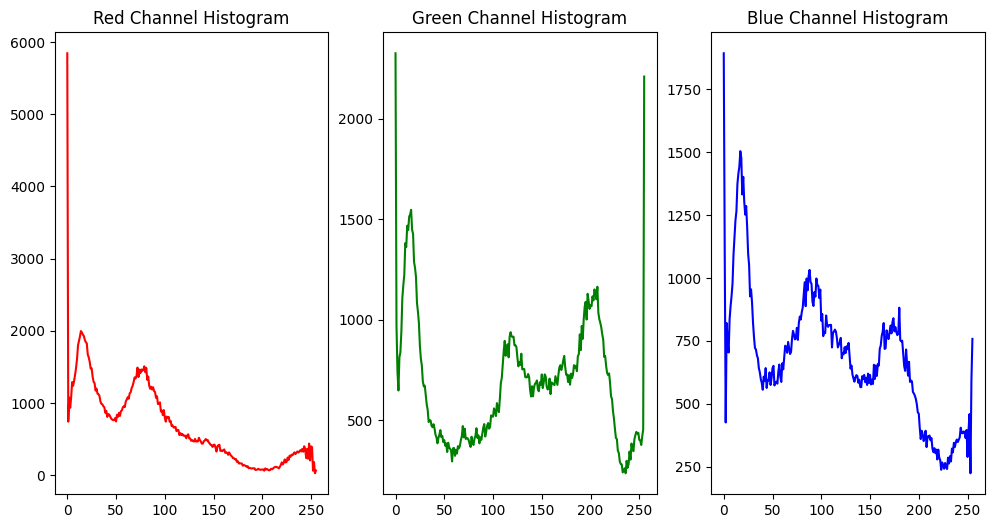

In [14]:

# Opening image and displaying it
image_path = 'butterfly.jpg'
image = cv2.imread(image_path)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply a binary threshold onto the image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# convert image colorspace to HSV and display the image
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(8, 6))
plt.imshow(hsv_image)
plt.title('HSV Image')
plt.axis('off')
plt.show()

# create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01)
low_pass_filter = np.ones((4, 4), dtype=np.float32) / 10

print(low_pass_filter)

# Using 2-D Convolution to blur the image
blurred_image = cv2.filter2D(image, -1, low_pass_filter)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image and then display the resulting gradient filtered version of the image.
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
gradient_image = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(gradient_image, cmap='gray')
plt.title('Horizontal Sobel Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

#plot the color histograms for the RED, BLUE, and GREEN channel of the image.
hist_red = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_blue = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.plot(hist_red, color='red'), plt.title('Red Channel Histogram')
plt.subplot(132), plt.plot(hist_green, color='green'), plt.title('Green Channel Histogram')
plt.subplot(133), plt.plot(hist_blue, color='blue'), plt.title('Blue Channel Histogram')
plt.show()
